# Finding Elastic Modulus of Aluminium (FCC)

## Importing Libraries

In [1]:
#importing required libraries
import sys;sys.path.append('/home/krish/elastic_modulus_python_md/')
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

from classes.constantsmd import *
from classes.functionsmd import *#(forceLJ3FCC, forceXLJ3, forceYLJ3, forceZLJ3, verlet_pos, writeXYZFile, numberOfAtoms, r, TimeGridAndForceGrid)
from classes.gridmd import (N_steps, makeLattice, makeLatticePos, plotPosGrid,
                            plotStructure)
print("-----------start-----------")

called constantmd
called gridmd
called functionsmd
-----------start-----------


## Initial Assignment

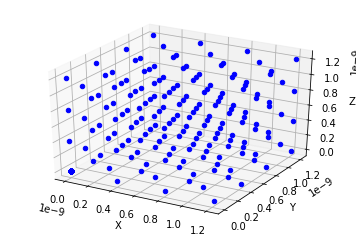

In [2]:
brick = np.array([
    [
        [1, 0, 1],
        [0, 1, 0],
        [1, 0, 1]
    ],

    [
        [0, 1, 0],
        [1, 0, 1],
        [0, 1, 0]
    ],

    [
        [1, 0, 1],
        [0, 1, 0],
        [1, 0, 1]
    ]            ])
N = np.array([3, 3, 3])

latticeGrid = makeLattice(brick, N[0], N[1], N[2])
posGrid = makeLatticePos(brick, N[0], N[1], N[2], ial/2, ialX=ial/2, ialY=ial/2, ialZ=ial/2)
#writeXYZFile(latticeGrid, posGrid,name='temp.xyz')
plotPosGrid(posGrid)

N[0] = posGrid.shape[0]
N[1] = posGrid.shape[1]
N[2] = posGrid.shape[2]

## Determining Position and Force for each timestep

In [3]:
time_grid = np.zeros([10,7,7,7,3])
# time_grid, force_grid = TimeGridAndForceGrid(posGrid, latticeGrid)
for t in range(N_steps):
    time_grid[t] = makeLatticePos(brick, 3, 3, 3, ial/2, ialX=(1+t/100)*ial/2, ialY=ial/2, ialZ=ial/2)

In [4]:
time_force_grid = TimeForceGrid(time_grid, latticeGrid)

0
1


KeyboardInterrupt: 

## Displaying Position of Atoms along the timeline

In [ ]:
for t in range(N_steps):
    plotPosGrid(time_grid[t])

## Calculating the Mean Force and Stress

In [ ]:
time_forceMean, time_stress, time_stress_applied = timeForceMeanAndTimeStress(time_force_grid, time_grid)

In [ ]:
time_forceMean

## Calculating End Strain

In [ ]:
endStrain = myStrain(time_grid, latticeGrid)
#abs(time_grid[1,0,0,2,0]-time_grid[1,N[0]-1,0,2,0])/abs(time_grid[0,0,0,0,0]-time_grid[0,N[0]-1,0,0,0])

In [ ]:
endStrain[:,:]

## Determining the Strain

In [ ]:
time_strainXYZ = StrainXYZ(time_grid)

## Strain-Time Diagram

In [ ]:
time_strainMean = timeStrainMean(time_grid, latticeGrid)
plt.plot(range(N_steps) ,time_strainMean[:,0])

In [ ]:
refStrain = np.zeros([N_steps,3])
for t in range(N_steps):
    refStrain[t,0] = np.mean(time_strainXYZ[t,:,:,:,0])
    refStrain[t,1] = np.mean(time_strainXYZ[t,:,:,:,1])
    refStrain[t,2] = np.mean(time_strainXYZ[t,:,:,:,2])
print(time_strainMean-refStrain)

## Stress-Time Diagram

In [ ]:
plt.plot(range(N_steps) ,time_stress[:,0])

In [ ]:
time_stress

## Stress-Strain Diagram

In [ ]:
n=N_steps
#fig, axs = plt.subplot(1,2)

plt.plot(time_strainMean[:n,0], time_stress[:n,0])
# plt.plot(refStrain[:n,0], time_stress[:n,0])
# plt.plot(endStrain[:n,0], time_stress[:n,0])
# plt.gca().legend(('time_strainMean','refStrain','endStrain'))
#plt.show()
plt.scatter(time_strainMean[:n,0], time_stress[:n,0])
# plt.scatter(refStrain[:n,0], time_stress[:n,0])
# plt.scatter(endStrain[:n,0], time_stress[:n,0])
# plt.gca().legend(('time_strainMean','refStrain','endStrain'))
plt.show()

In [ ]:
for t in range(N_steps):
    print(endStrain[t,0],'\t',time_strainMean[t,0],'\t', refStrain[t,0])

## Stress/Strain Value

In [ ]:
for i in range(N_steps):
    print((time_stress[i,0]/time_strainMean[i,0])/1e9, '\t', (time_stress[i,0]/refStrain[i,0])/1e9, '\t', (time_stress[i,0]/endStrain[i,0])/1e9, "GPa")

In [ ]:
# for t in range(N_steps):
#     plotPosGrid(time_gridUser[t])

## Completion Alert

In [ ]:
import platform
platform.system()
if(platform.system()=='Windows'):
    import winsound
    duration = 1000  # millisecond
    freq = 440  # Hz
    winsound.Beep(freq, duration)
if(platform.system()=='Linux'):
    import os
    os.system('spd-say "your program is finished"')


## Program End

In [ ]:
print("------------end------------")